## 决策树


### 认识决策树
- 决策树(Decision Tree)是一种有监督学习方法，它能够从一系列有特征和标签的数据中总结出决策（基于分类或者回归）规则，并用树状图的结构来呈现这些规则，以解决分类和回归问题。决策树算法容易理解，适用各种数据，在解决各种问题时都有良好表现，尤其是以树模型为核心的各种集成算法，在各个行业领域都有广泛的应用。

- 我们来简单了解一下决策树是如何工作的。决策树算法的本质是一种树结构，我们只需要问一系列问题就可以对数据进行分类了。比如说，来看看下面的一组数据集，这是一些列已知物种以及所属类别的数据：
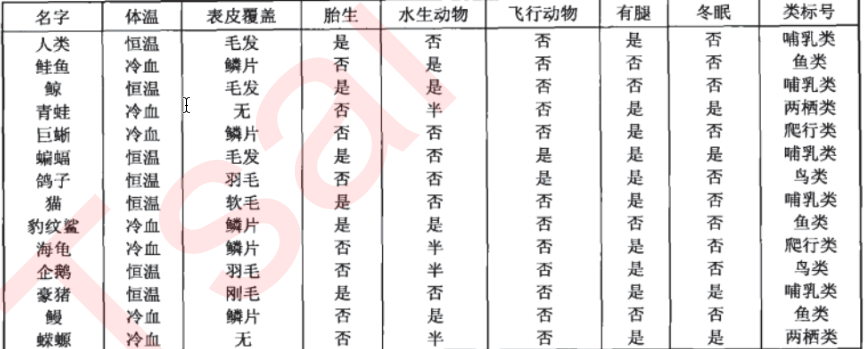

- 我们现在的目标是，将动物们分为哺乳类和非哺乳类。那根据已经收集到的数据，决策树算法为我们算出了下面的这棵决策树：
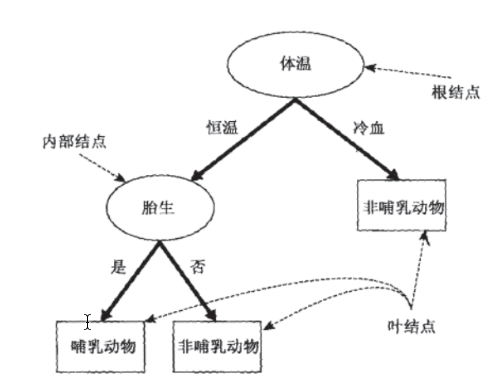
    - 假如我们现在发现了一种新物种Python，它是冷血动物，体表带鳞片，并且不是胎生，我们就可以通过这棵决策树来判断它的所属类别。

- 可以看出，在这个决策过程中，我们一直在对记录的特征进行提问。最初的问题所在的地方叫做根节点，在得到结论前的每一个问题都是中间节点，而得到的每一个结论(动物的类别)都叫做叶子节点。

### 节点
- 根节点:没有进边，有出边。包含最初的，针对特征的提问。 
- 中间节点:既有进边也有出边，进边只有一条，出边可以有很多条。都是针对特征的提问。 
- 叶子节点:有进边，没有出边，每个叶子节点都是一个类别标签。 
- 子节点和父节点:在两个相连的节点中，更接近根节点的是父节点，另一个是子节点。

- 相亲案例：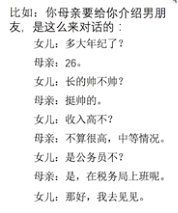

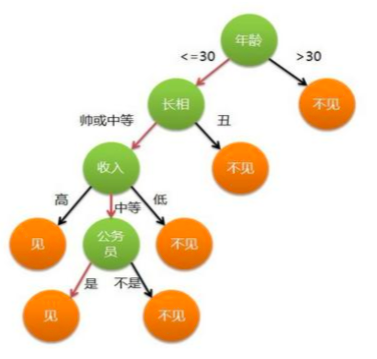
- 上述案例中就可以将被相亲对象预测为见或者不见。上述分叉的结构就是决策树，如果一个决策树建立好之后，就可以基于该树的相关分支得到不同分类的预测结果。

- 问题：为什么上述决策树中不把收入（特征）作为判断的第一步（作为树的根节点）呢？
    - 树的根节点和中间节点对应的是某一种类型特征，那么这些节点（特征）自上而下的重要性应该是由大到小进行排列的。
    - 因为我们普遍的认为年龄的重要性要大于收入！当然树中的这些节点具有怎样的重要性都是我们根据以往的经验来设定的，其实这样是不精准的，因为经验会有误差，不严谨。那么决策树模型肯定是根据有理有据的科学的方法进行重要性的设定的。那么如何科学设定呢？首先我们得先知道决策树算法主要解决的问题是什么！

### 决策树算法的核心是要解决两个问题:
- 1.如何从数据表中找出最佳节点或最佳分枝?
- 2.如何让决策树停止生长，防止过拟合? 
    - 决策树是基于训练集数据构建出来的，如果树长的越大分支越细致，则对训练数据的描述越清楚，但是不一定会很好的作用到测试数据中。
- 几乎所有决策树有关的模型调整方法，都围绕这两个问题展开。接下来，我们就来了解一下决策树背后的原理。

### 构建决策树
- 接下来讨论如何根据已有的数据集来建立有效的决策树。原则上讲，任意一个数据集上的所有特征都可以被拿来分枝，特征上的任意节点又可以自由组合，所以一个数据集上可以发展出非常非常多棵决策树，其数量可达指数级。在这些树中，总有那么一棵树比其他的树分类效力都好，那样的树叫做”全局最优树“。
    - 全局最优:经过某种组合形成的决策树，整体来说分类效果为最好的模型
    - 局部最优:每一次分枝的时候都向着更好的分类效果分枝，但无法确认如此生成的树在全局上是否是最优的

- 要在这么多棵决策树中去一次性找到分类效果最佳的那一棵是不可能的，如果通过排列组合来进行筛选，计算量过于大而且低效，因此我们不会这样做。相对的，机器学习研究者们开发了一些有效的算法，能够在合理的时间内构造出具有一定准确率的次最优决策树。
- 这些算法基本都执行”贪心策略“，即通过局部的最优来达到我们相信是最接近全局最优（次最优决策树）的结果。

- 贪心算法
    - 通过实现局部最优来达到接近全局最优结果的算法，所有的树模型都是这样的算法。


### ID3算法构建决策树
- 最典型的决策树算法是Hunt算法，该算法是由Hunt等人提出的最早的决策树算法。现代，Hunt算法是许多决策树算法的基础，包括ID3、C4.5和CART等。此处以应用较广、理论基础较为完善的ID3算法的基本原理开始，讨论如何利用局部最优化方法来创建决策模型。

- 为了要将数据集转化为一棵树，决策树需要找出最佳节点和最佳的分枝方法，而衡量这个“最佳”的指标叫做“不纯度”。 不纯度基于叶子节点来计算的，所以树中的每个节点都会有一个不纯度，并且子节点的不纯度一定是低于父节点的， 也就是说，在同一棵决策树上，叶子节点的不纯度一定是最低的。

#### 不纯度
- 决策树的每个根节点和中间节点中都会包含一组数据（工作为公务员为某一个节点），在这组数据中，如果有某一类标签占有较大的比例，我们就说该节点越“纯”，分枝分得好。某一类标签占的比例越大，叶子就越纯，不纯度就越低，分枝就越好。 
- 如果没有哪一类标签的比例很大，各类标签都相对平均，则说该节点”不纯“，分枝不好，不纯度高

- 这个其实非常容易理解。分类型决策树在节点上的决策规则是少数服从多数，在一个节点上，如果某一类标签所占的比例较大，那所有进入这个节点的样本都会被认为是这一类别。具体来说，如果90%根据规则进入节点的样本都是类别0(节点比较纯)，那新进入该节点的测试样本的类别也很有可能是0。但是，如果51%的样本是0，49%的样本是1(极端情况)，该节点还是会被认为是0类的节点，但此时此刻进入这个节点的测试样本点几乎有一半的可能性应该是类别1。从数学上来说，类分布为(0,100%)的结点具有零不纯性，而均衡分布 (50%,50%)的结点具有最高的不纯性。如果节点本身不纯，那测试样本就很有可能被判断错误，相对的节点越纯，那样本被判断错误的可能性就越小。
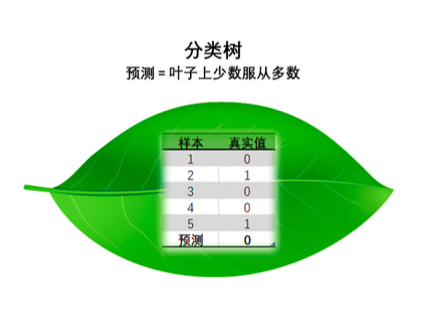

### 如何计算不纯度？
- 信息熵

#### 信息论基础

- 问题：现在有32支球队，然后猜出谁是冠军！
    - 如果我们不知道球队的任何信息情况下，我们可以这么猜：
        - 你可能会乱猜那么猜对的几率为1/32。
            - 如果你没猜错一次需要付出一定的代价，则你就会设计方法提升猜你对的几率而减少代价。
        - 每次折半猜，将32只球队以此编码为1-32，则第一次你会问，冠军在1-16中，在1-8中吗等等这样折半的猜，那么这样势必会减少猜错的几率，付出较少的代价。
            - 折半猜的话只需要猜log32=5次（底数为2）就可以知道结果啦。
- 结论：
    - 我们已经知道32只球队猜对的代价为log32=5次，64只球队猜对的代价为log64=6次，以信息论的角度来讲的话，代价为5次或者代价为6次被称为代价为5比特或者代价为6比特。

- 比特：就是信息论中信息度量的单位也叫做信息量。这个概念是由信息论的创始人【香农】提出的。

### - 重点：香农在信息论中提出信息量的值会随着更多有用信息的出现而降低。

- 继续猜冠军的问题：
    - 如果将32只球队的一些往期比赛胜负的数据进行公开，则《谁是冠军》的信息量的值肯定会小于5比特，其精准的信息量的值计算法则为：注意信息量的值在信息论中被称为信息熵
        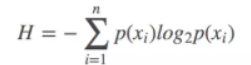

- 公式解释：
    - 在谁是冠军例子中，n就是32，p(xi)就是某只球队获胜的概率，H为信息量的值叫做【信息熵】
        - 信息熵（entropy）：是一种信息的度量方式，表示信息的混乱程度，也就是说：信息越有序，信息熵越低（不纯度或者信息量越低）。

    - 比特or信息量也就是信息熵的单位。那么在谁是冠军的例子中每一个球队获胜的概率为1/32，通过折半计算的代价也就是信息熵为5：
        - 5 = - (1/32log1/32 + 1/32log1/32 + ......),因为log1/32=-5（2**-5==1/32）为负数,所以求和后加一个负号表示正的结果5。5就是该事件的信息熵。
        - 如果获知了球队的往期获胜数据公开后，则德国获胜概率为1/4，西班牙为1/5，中国为1/20，则带入香农公式中为：
            - 5 >= - (1/5log1/5 + 1/32+log1/32 + 1/4+log1/4+......)结果值一定小于5
        - 结论：信息熵和消除不确定性是相关联的
            - 信息熵越大则表示信息的不确定性越大，猜对的代价大
            - 信息熵越小则表示信息的不确定性越小，猜对的代价小

#### 信息增益

- 为什么越重要的特征要放在树的越靠上的节点位置呢？
    - 因为我们的分类结果是要从树的根节点开始自上而下的进行分步判断从而得到正确的划分结论。越重要的节点作为树中越靠上的节点可以减少基于该树进行分类的更多的不确定性。
        - 比如：将年龄作为根节点进行见面或者不见面的分类，可以比把收入作为根节点进行见或者不见的分类要降低了更多的不确定性。因为年龄如果太大的话直接就不见了，如果年龄适中则继续根据树下面的节点特征继续进行判断。如果将收入作为根节点，则收入高的话也不可以直接就见或者不见，还得考虑年纪问题，样貌问题等等。

- 如何衡量决策树中节点（特征）的重要性呢？如何理解特诊的重要性呢？
    - 重要性：如果一个节点减少分类的不确定性越明显，则该节点就越重要。
        - 年龄要比收入可以减少更多见与不见分类结果的不确定性。
    - 使用信息增益衡量特征的重要性

- 信息增益：
    - 在根据某个特征划分数据集之前之后信息熵发生的变化or差异叫做信息增益，知道如何计算信息增益，获得计算增益最高的特征就是最好的选择。
    - 信息增益作为决策树的划分依据，决定决策树怎么画，每个特征作为节点存放位置的确定。

- 信息增益g(D,A)计算公式为：公式其实看不看得懂不重要，重要的是求解的思路

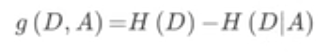
    - 公式解释：信息增益 = 划分前熵 - 划分后熵

<h5>- 总之需要计算出每个特征的信息增益，特征的信息增益越大，则表示该特征越重要，应该放在决策树越靠上的位置！！！</h5>

#### 构建决策树
- 在构造决策树时，我们需要解决的第一个问题就是，当前数据集上哪个特征在划分数据分类时起决定性的作用。为了找到决定性的特征，划分出最好的结果，我们必须评估每个特征。那么在构造过程中，你要解决三个重要的问题：
    - 选择哪个属性作为根节点；
    - 选择哪些属性作为子节点；
    - 什么时候停止并得到目标状态，即叶节点。
- 接下来以气象数据为例子，来说明决策树的构建过程：

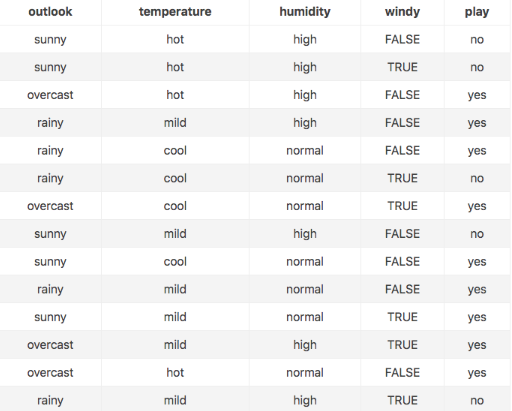

- 在没有使用特征划分类别的情况下，有9个yes和5个no，当前的熵为：
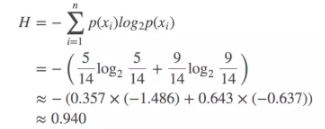

- 假设我们以 outlook 特征作为决策树的根节点划分数据集，对该特征每项指标分别统计：在不同的取值下 play 和 no play 的次数：
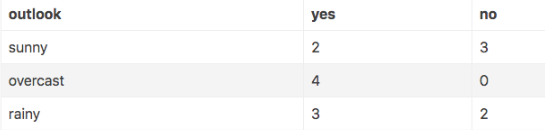

- 此时各分支的熵计算如下：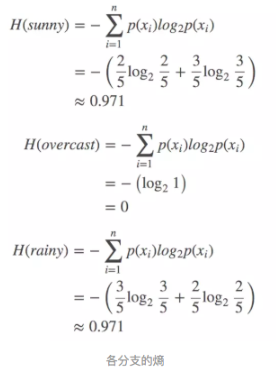

--- p(xi)指的是某一个节点（sunny）中，某一类别占据该节点总类别的比例

- 因此如果用特征outlook来划分数据集的话，总的熵为：
    - 每一个outlook的组成的信息熵乘以outlook组成占总样本的比例
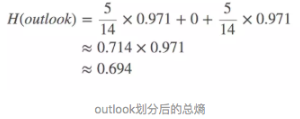

- 那么最终得到特征属性outlook带来的信息增益为：
    - g(outlook)=0.940−0.694=0.246
    - 然后用同样的方法，可以分别求出temperature，humidity，windy的信息增益分别为：
        - IG(temperature)=0.029
        - IG(humidity)=0.152
        - IG(windy)=0.048
            - 可以得出使用outlook特征所带来的信息增益最大。因此第一次切分过程将采用outlook字段进行切分数据集。

- 第一次切分完毕后，分成了三个数据集sunny，overcast，rain。期中overcast所指向的数据集纯度为1，因此不用在对其进行切分。而剩下两个纯度不为1则需要对其继续切分。然而对sunny数据集而言使用humidity特征进行切分后节点纯度就变为1了，则不再进行继续切分，同理对rain而言使用windy特征进行切分纯度也变为了1不需要再次进行切分。最终决策树为如下：

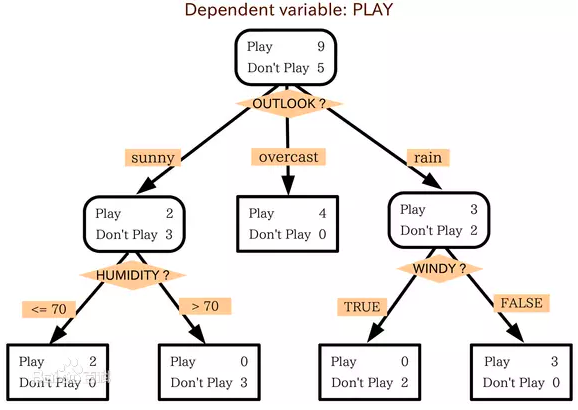

#### ID3的局限性
- 不能直接处理连续型数据集，若要使用ID3处理连续型变量，则首先需要对连续变量进行离散化 
    - 连续性数据集是指数据的目标值为连续性，则无法计算某类别样例数量占总类别样例的占比。
- 对缺失值较为敏感，使用ID3之前需要提前对缺失值进行处理 
    - 存在缺失值则信息熵的公式无法计算结果
- 没有剪枝的设置，容易导致过拟合，即在训练集上表现很好，测试集上表现很差

#### 其他算法：

- CART（基尼系数）
    - CART 的全称是分类与回归树。从这个名字中就应该知道，CART 既可以用于分类问题，也可以用于回归问题。
    - CART 与 ID3，C4.5 不同之处在于 CART 生成的树必须是二叉树。也就是说，无论是回归还是分类问题，无论特征是离散的还是连续的，无论属性取值有多个还是两个，内部节点只能根据属性值进行二分。


#### 如何选取使用何种算法
- 在实际使用中，信息熵和基尼系数的效果基本相同。信息熵的计算比基尼系数缓慢一些，因为基尼系数的计算不涉及对数。另外，因为信息熵对不纯度更加敏感，所以信息熵作为指标时，决策树的生长会更加“精细”，因此对于高维数据或者噪音很多的数据，信息熵很容易过拟合，基尼系数在这种情况下效果往往比较好。当模型拟合程度不足的时候，即当模型在训练集和测试集上都表 现不太好的时候，使用信息熵。当然，这些不是绝对的。

- API：
    - class sklearn.tree.DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)[source]

### 创建一颗决策树
- 使用datasets中的红酒数据集

In [4]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
data = load_wine()
feature = data.data
target = data.target
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.2,random_state=2021)

In [12]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
tree.score(x_test,y_test)

0.9166666666666666

- 为何每次测评的分数不一致呢？
    - 决策树在建树时，是靠优化节点来追求一棵最优化的树，但最优的节点能够保证构建出一颗最优的树吗?不能！sklearn表示，既然一棵树不能保证最优，那就建更 的不同的树，然后从中取最好的。怎样从一组数据集中建不同的树呢?在每次分枝时，不使用全部特征，而是随机选取一部分特征，从中选取不纯度相关指标最优的作为分枝用的节点。这样，每次生成的树也就不同了。

### 参数random_state
    - random_state用来设置分枝中的随机模式的参数，默认None，在高维度时随机性会表现更明显，低维度的数据(比如鸢尾花数据集)，随机性几乎不会显现。输入任意整数，会一直长出同一棵树，让模型稳定下来。


In [21]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=2021,criterion='entropy')
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9722222222222222

#### 画出决策树
- 在anaconda的navigator中open terminal中执行：
    - conda install graphviz 
    - pip install graphviz 
    - 重启终端服务即可

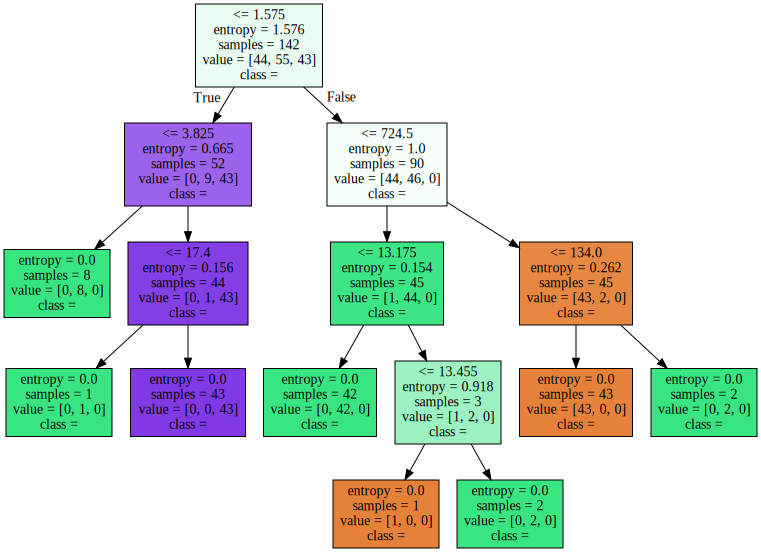

In [22]:
import graphviz
from sklearn import tree
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
dot_data = tree.export_graphviz(model
                                ,out_file = None#图片保存路径
                                ,feature_names= feature_name 
                                ,class_names=["琴酒","雪莉","贝尔摩德"] 
                                ,filled=True#使用颜色表示分类结果
                               )
graph = graphviz.Source(dot_data)
graph

### 重要属性

In [24]:
#返回特征的重要性
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜 色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
[*zip(feature_name,model.feature_importances_)]

[('酒精', 0.030920915536350756),
 ('苹果酸', 0.0),
 ('灰', 0.0),
 ('灰的碱性', 0.030774358710285422),
 ('镁', 0.052756524257609204),
 ('总酚', 0.0),
 ('类黄酮', 0.443419375970789),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜 色强度', 0.12370581527805469),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.31842301024691094)]

### 参数splitter
- splitter也是用来控制决策树中的随机选项的，有两种输入值：
    - 输入”best"，决策树在分枝时虽然随机，但是还是会优先选择更重要的特征进行分枝(重要性可以通过属性feature_importances_查看)
    - 输入“random"，决策树在分枝时会更加随机，树会因为含有更多的不必要信息而更深更大，并因这些不必要信息而降低对训练集的拟合。这也是防止过拟合的一种方式。
- 当你预测到你的模型会过拟合，用splitter和random_state这两个参数来帮助你降低树建成之后过拟合的可能性。

### 剪枝参数
- 在不加限制的情况下，一棵决策树会生长到衡量不纯度的指标最优，或者没有更多的特征可用为止。这样的决策树 往往会过拟合，这就是说，它会在训练集上表现很好，在测试集上却表现糟糕。我们收集的样本数据不可能和整体 的状况完全一致，因此当一棵决策树对训练数据有了过于优秀的解释性，它找出的规则必然包含了训练样本中的噪 声，并使它对未知数据的拟合程度不足。
- 为了让决策树有更好的泛化性，我们要对决策树进行剪枝。剪枝策略对决策树的影响巨大，正确的剪枝策略是优化 决策树算法的核心。sklearn为我们提供了不同的剪枝策略:
    - max_depth：限制树的最大深度，超过设定深度的树枝全部剪掉
        - 这是用得最广泛的剪枝参数，在高维度低样本量时非常有效。决策树多生长一层，对样本量的需求会增加一倍，所 以限制树深度能够有效地限制过拟合。在集成算法中也非常实用。实际使用时，建议从=3开始尝试，看看拟合的效 果再决定是否增加设定深度。
    - min_samples_leaf & min_samples_split：
        - min_samples_leaf限定，一个节点在分枝后的每个子节点都必须包含至少min_samples_leaf个训练样本，否则分 枝就不会发生，或者，分枝会朝着满足每个子节点都包含min_samples_leaf个样本的方向去发生。一般搭配max_depth使用。这个参数的数量设置得太小会引 起过拟合，设置得太大就会阻止模型学习数据。一般来说，建议从=5开始使用。
        - min_samples_split限定，一个节点必须要包含至少min_samples_split个训练样本，这个节点才允许被分枝，否则 分枝就不会发生。

In [34]:
model = DecisionTreeClassifier(random_state=2021,criterion='entropy',max_depth=4,min_samples_split=60)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=60,
                       random_state=2021)

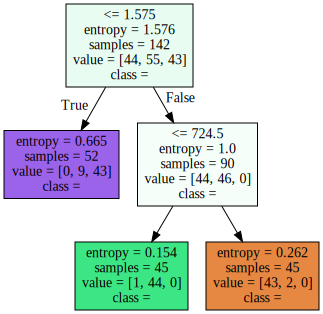

In [35]:
import graphviz
from sklearn import tree
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
dot_data = tree.export_graphviz(model
                                ,out_file = None#图片保存路径
                                ,feature_names= feature_name 
                                ,class_names=["琴酒","雪莉","贝尔摩德"] 
                                ,filled=True#使用颜色表示分类结果
                               )
graph = graphviz.Source(dot_data)
graph

### 泰坦尼克号乘客生存分类
- 泰坦尼克号的沉没是世界上最严重的海难事故之一，今天我们通过分类树模型来预测一下哪些人可能成为幸存者。 数据集为data.csv

### 特征介绍
- Survived：是否生存
- Pclass：船票等级，表示乘客社会经济地位
- Name，Sex，Age
- SibSp：泰坦尼克号上的兄弟姐妹/配偶数
- Parch：泰坦尼克号上的父母/子女数量
- Ticket：船票号
- Fare：票价
- Cabin：船舱号
- Embarked：登船港口号

In [36]:
import pandas as pd
pd.read_csv('./datasets/data.csv')

/Users/bobo/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 用网格搜索调整参数
- Grid Search：一种调参手段；穷举搜索：在所有候选的参数选择中，通过循环遍历，尝试每一种可能性，表现最好的参数就是最终的结果。其原理就像是在数组里找最大值。（为什么叫网格搜索？以有两个参数的模型为例，参数a有3种可能，参数b有4种可能，把所有可能性列出来，可以表示成一个3*4的表格，其中每个cell就是一个网格，循环过程就像是在每个网格里遍历、搜索，所以叫grid search）
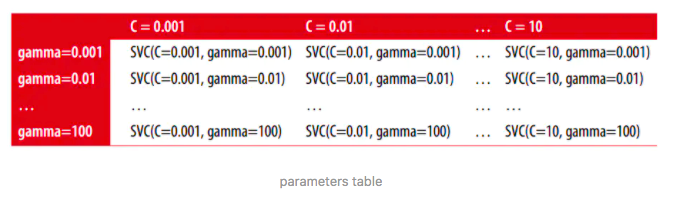


In [16]:
import numpy as np
from sklearn.model_selection import GridSearchCV

parameters = {'splitter':('best','random')
              ,'criterion':("gini","entropy")
              ,"max_depth":[*range(1,10)]
              ,'min_samples_leaf':[*range(1,50,5)]
}
clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf, parameters, cv=10)
GS.fit(Xtrain,Ytrain)
GS.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [17]:
GS.best_score_

0.8118791602662571